# Regression Assignment - 02

## Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it represent?

**Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it represent?**

### 📌 **Concept of R-squared:**

**R-squared (R²)**, also known as the **coefficient of determination**, is a statistical measure used in **linear regression models** to evaluate how well the independent variables explain the variability of the dependent variable.

---

### 🔍 **What does it represent?**

R-squared tells us the **proportion of variance** in the dependent variable (**Y**) that can be explained by the independent variable(s) (**X**).  
- Its value ranges from **0 to 1** (or **0% to 100%**).
  - **R² = 1 (100%)** → Perfect fit: all data points lie exactly on the regression line.
  - **R² = 0** → The model explains **none** of the variability in the target variable.
- Higher R² indicates a better fit, but not necessarily a better model (overfitting is still a risk).

---

### 🧮 **How is R-squared calculated?**

R² is calculated using the following formula:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:
- $$ SS_{\text{res}} $$: **Residual Sum of Squares**  
$$
SS_{\text{res}} = \sum (y_i - \hat{y}_i)^2
$$
(This is the error between actual and predicted values)

- $$ SS_{\text{tot}} $$: **Total Sum of Squares**  
$$
SS_{\text{tot}} = \sum (y_i - \bar{y})^2
$$ 
(This is the total variation in the actual values)

- \( y_i \): Actual value  
- \( \hat{y}_i \): Predicted value  
- \( \bar{y} \): Mean of actual values

---

### ✅ **Example (Simple Interpretation):**

If a model has an **R² = 0.85**, it means **85%** of the variance in the dependent variable can be explained by the model's predictors. The remaining 15% is due to unknown or unmeasured factors.

---

### ⚠️ **Cautions when using R-squared:**
- It **does not** indicate whether the model is appropriate.
- It **does not** tell you if your independent variables are statistically significant.
- In multiple regression, **Adjusted R²** is preferred as it accounts for the number of predictors in the moden!

R-squared: 0.9383


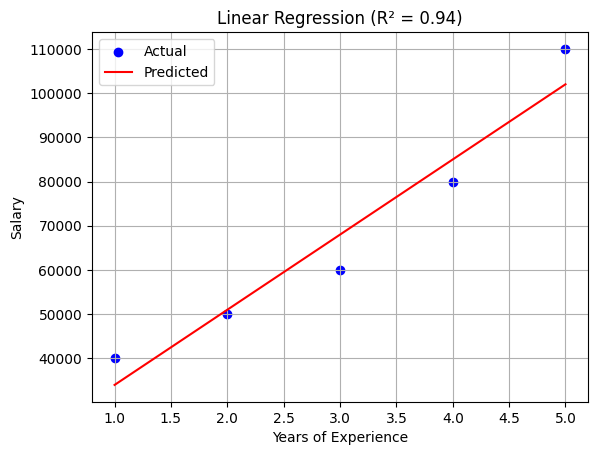

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)     # Years of experience
y = np.array([40000, 50000, 60000, 80000, 110000])  # Salary

# Model fitting
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", round(r2, 4))

# Plotting
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Linear Regression (R² = {round(r2, 2)})')
plt.legend()
plt.grid(True)
plt.show()



---

### 📊 **What You’ll See:**
- **Blue dots**: Actual salary values.
- **Red line**: Regression line (model predictions).
- The R² value tells you **how closely the red line fits the blue dots**.

---

### 📌 **Interpretation:**
- If R² is close to 1 → predictions are good.
- If R² is low → predictions are far from actuals (model is weak).

## Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.

**Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.**

---

### 📌 **What is Adjusted R-squared?**

**Adjusted R-squared** is a modified version of the regular R-squared that adjusts for the **number of independent variables** in the model. It’s used to measure how well a regression model generalizes to **new data**, especially in **multiple linear regression**.

---

### 🔍 **Why do we need it?**

Adding more variables to a model **always increases R-squared**, even if the new variables are irrelevant.  
This is misleading, because a higher R-squared doesn’t always mean a better model.

**Adjusted R-squared penalizes** the model for including too many predictors.

---

### 🧮 **Adjusted R-squared Formula:**

$$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$

Where:
- \( R^2 \) = Regular R-squared
- \( n \) = Number of observations
- \( k \) = Number of independent variables (predictors)

---

### ⚖️ **Key Differences Between R-squared and Adjusted R-squared:**

| Feature              | R-squared                      | Adjusted R-squared               |
|----------------------|-------------------------------|----------------------------------|
| Purpose              | Measures fit of the model      | Measures fit, adjusted for complexity |
| Behavior             | Increases with more predictors | Can **increase or decrease**     |
| Penalizes complexity | ❌ No                          | ✅ Yes                           |
| Range                | 0 to 1                         | Can be negative, up to 1         |

---

### ✅ **When to use Adjusted R-squared:**

- In **multiple regression** models with **more than one predictor**
- When comparing **different models** with varying numbers of features

---

### 🧠 **Quick Tip:**
- If adding a new variable increases **Adjusted R²**, it’s likely useful.
- If Adjusted R² **decreases**, the new variable may be unnecessary.



🧪 Scenario:
We'll build two regression models to predict y:

Using one predictor (X1)

Using two predictors (X1 and a random noise variable X2)

🧾 Code Example:

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
np.random.seed(0)
n = 100
X1 = np.random.rand(n, 1) * 10                  # Useful predictor
X2 = np.random.rand(n, 1)                       # Random noise
y = 3 * X1.squeeze() + np.random.randn(n) * 2   # Target with some noise

# Combine X1 and X2
X1_only = X1
X1_X2 = np.hstack((X1, X2))

# Model 1: Only X1
model1 = LinearRegression().fit(X1_only, y)
y_pred1 = model1.predict(X1_only)
r2_1 = r2_score(y, y_pred1)
adj_r2_1 = 1 - (1 - r2_1) * (n - 1) / (n - 1 - 1)

# Model 2: X1 + X2
model2 = LinearRegression().fit(X1_X2, y)
y_pred2 = model2.predict(X1_X2)
r2_2 = r2_score(y, y_pred2)
adj_r2_2 = 1 - (1 - r2_2) * (n - 1) / (n - 2 - 1)

# Print results
print(f"Model 1 (X1 only):")
print(f"  R-squared:        {r2_1:.4f}")
print(f"  Adjusted R-sq:    {adj_r2_1:.4f}\n")

print(f"Model 2 (X1 + X2):")
print(f"  R-squared:        {r2_2:.4f}")
print(f"  Adjusted R-sq:    {adj_r2_2:.4f}")


Model 1 (X1 only):
  R-squared:        0.9541
  Adjusted R-sq:    0.9536

Model 2 (X1 + X2):
  R-squared:        0.9544
  Adjusted R-sq:    0.9534



### 🧠 **Expected Output Interpretation:**

- **Model 2’s R-squared** will be slightly higher because adding a variable always increases R².
- **Model 2’s Adjusted R-squared** may **drop or increase slightly**, depending on whether `X2` (the random noise) helps or not.

So, **Adjusted R² protects you from adding junk variables**!



# Q3. When is it more appropriate to use adjusted R-squared?

**Q3. When is it more appropriate to use Adjusted R-squared?**

---

### ✅ **Use Adjusted R-squared when:**

#### 1. **You are working with multiple independent variables (features):**
- In **multiple linear regression**, each additional predictor increases the chance of inflating R².
- Adjusted R² compensates for this by penalizing unnecessary or irrelevant variables.

> 📌 **Example:**  
If you're predicting house prices using `area`, `bedrooms`, `bathrooms`, and `zipcode`, adjusted R² helps you see if adding `zipcode` truly improves the model.

---

#### 2. **You want to compare models with different numbers of predictors:**
- When comparing two or more models, **higher R²** doesn't always mean a **better model**.
- **Adjusted R²** helps decide which model strikes the best balance between **complexity and performance**.

> 📊 **Tip:**  
Model with the **highest Adjusted R²** is often the most reliable choice — not necessarily the one with the most variables.

---

#### 3. **You're performing feature selection or model optimization:**
- When using **backward elimination**, **forward selection**, or **stepwise regression**, adjusted R² is a better metric for choosing which variables to keep or drop.

---

#### 4. **You suspect overfitting:**
- A model with too many features might fit the training data very well (high R²), but generalize poorly.
- A **drop in Adjusted R²** when adding a variable is a red flag 🚩 — the variable is likely adding noise, not value.

---

#### **Why?**
Regular R-squared always increases (or stays the same) as you add more variables to the model, even if those variables are not actually useful.

Adjusted R-squared, on the other hand, penalizes the addition of irrelevant variables. It only increases if the new variable improves the model more than would be expected by chance.

### 🧠 **Summary:**

| Use Case                              | Use R²? | Use Adjusted R²? |
|---------------------------------------|--------|------------------|
| Simple linear regression (1 feature)  | ✅     | Not necessary    |
| Multiple regression (many features)   | ❌     | ✅               |
| Comparing models with different sizes | ❌     | ✅               |
| Checking for overfitting              | ❌     | ✅               |

---

Let me know if you'd like a visual or code-based example showing when Adjusted R² drops!

## Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics calculated, and what do they represent?

**Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics calculated, and what do they represent?**

In regression analysis, RMSE, MSE, and MAE are **error metrics** used to measure how well a model’s predictions match the actual values. Each one evaluates prediction accuracy in a slightly different way:

---

### 🔹 1. **MSE (Mean Squared Error)**  
**Formula:**  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- \( y_i \) = actual value  
- \( \hat{y}_i \) = predicted value  
- \( n \) = number of observations

**Represents:**  
- The average of the squared differences between actual and predicted values.  
- **Sensitive to large errors** because it squares them.  
- Lower MSE = better model.

---

### 🔹 2. **RMSE (Root Mean Squared Error)**  
**Formula:**  
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Represents:**  
- Square root of MSE.  
- Brings the error back to the original units of the target variable.  
- Still **penalizes large errors** heavily.  
- Often used when interpretability in original units is important.

---

### 🔹 3. **MAE (Mean Absolute Error)**  
**Formula:**  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**Represents:**  
- The average of the **absolute** differences between actual and predicted values.  
- **Less sensitive to outliers** than MSE/RMSE.  
- Good for understanding the typical size of the error.

---

### 🔸 Quick Comparison:

| Metric | Penalizes Large Errors More? | Units | Sensitive to Outliers? |
|--------|------------------------------|--------|-------------------------|
| **MSE** | Yes (squared errors)          | Squared units | Yes |
| **RMSE** | Yes (but interpretable)     | Same as target | Yes |
| **MAE** | No                           | Same as target | Less |

---


In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Actual values
y_true = np.array([3, -0.5, 2, 7])

# Predicted values
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 0.375
RMSE: 0.6123724356957945
MAE: 0.5



### 🔍 Interpretation:

- On average, the squared error is **0.375** (MSE).
- The root mean squared error is about **0.61**, which is in the same unit as the original values.
- The average absolute error is **0.5**, meaning predictions are typically off by about **0.5 units**.

Let me know if you want to try this on your own data or want a visualization!

## Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in regression analysis.

**Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in regression analysis.**

Each of these metrics—**RMSE**, **MSE**, and **MAE**—has its own strengths and weaknesses. Here's a breakdown to help understand when and why you'd choose one over the others:

---

### 🔷 **1. MSE (Mean Squared Error)**

#### ✅ **Advantages:**
- **Strongly penalizes large errors** due to squaring — helpful when large errors are especially bad.
- Common in optimization because it’s mathematically smooth and differentiable, making it suitable for gradient-based algorithms.

#### ❌ **Disadvantages:**
- Output is in **squared units**, which can be hard to interpret.
- **Very sensitive to outliers**, which can skew the error measurement.

---

### 🔷 **2. RMSE (Root Mean Squared Error)**

#### ✅ **Advantages:**
- Similar to MSE but **in the same unit as the target variable**, making it easier to interpret.
- Like MSE, it also penalizes larger errors more, which can be useful in some applications.

#### ❌ **Disadvantages:**
- Still **sensitive to outliers**.
- May give a misleading impression of performance if a few large errors dominate.

---

### 🔷 **3. MAE (Mean Absolute Error)**

#### ✅ **Advantages:**
- **Easy to understand and interpret** — tells you the average error.
- **Less sensitive to outliers** than MSE or RMSE.
- Useful when all errors are equally important.

#### ❌ **Disadvantages:**
- Not differentiable at zero, which can make optimization slightly trickier (though manageable).
- Doesn’t emphasize large errors, which could be a downside if your application cares about big misses.

---

### 🧠 **Summary Table:**

| Metric | Penalizes Large Errors | Interpretable Units | Outlier Sensitivity | Optimization Friendly |
|--------|------------------------|----------------------|---------------------|------------------------|
| **MSE** | High ✅ | ❌ Squared units | ✅ High | ✅ Excellent |
| **RMSE** | High ✅ | ✅ Same as target | ✅ High | ✅ Good |
| **MAE** | Low ❌ | ✅ Same as target | ❌ Low | ⚠️ Slightly harder |

---

### 🔍 **When to Use Which?**

- **MSE / RMSE:** When you want to **punish large errors** more severely (e.g., in finance, safety-critical systems).
- **RMSE:** When you need **interpretability** in the same units as your target variable.
- **MAE:** When you care about **overall prediction accuracy** and want to be **robust to outliers**.

Let’s visualize and compare **MSE**, **RMSE**, and **MAE** with a simple real-world-like example using Python and a plot.

---

### 📦 **Scenario:**
Imagine you're predicting house prices (in lakhs), and you want to compare the three error metrics.

---

### ✅ Python Code with Visualization:

MSE: 82.0
RMSE: 9.055385138137417
MAE: 5.2


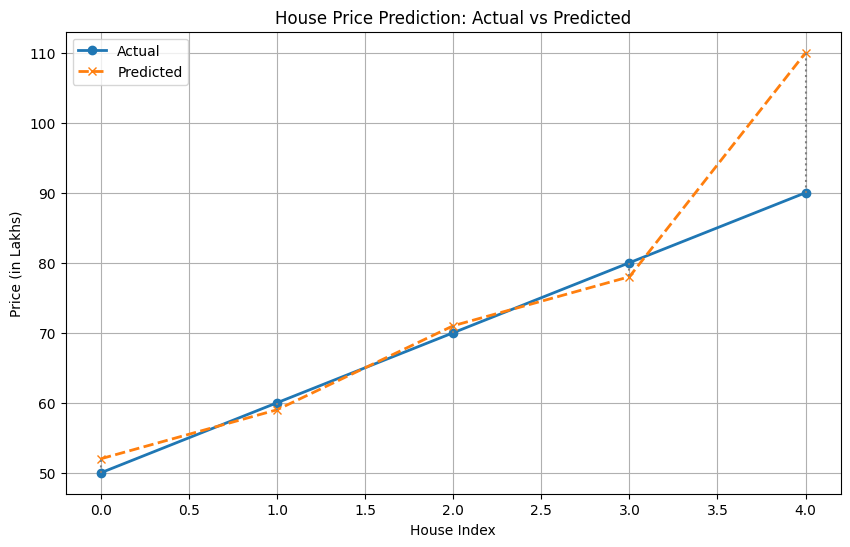

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Actual house prices (in lakhs)
y_true = np.array([50, 60, 70, 80, 90])

# Model A Predictions (with a large error at the end)
y_pred = np.array([52, 59, 71, 78, 110])  # Last value is a large error

# Calculate Errors
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Plotting
x = np.arange(len(y_true))

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Actual', marker='o', linewidth=2)
plt.plot(x, y_pred, label='Predicted', marker='x', linestyle='--', linewidth=2)

# Draw error lines
for i in range(len(y_true)):
    plt.vlines(x[i], y_true[i], y_pred[i], color='gray', linestyles='dotted')

plt.title('House Price Prediction: Actual vs Predicted')
plt.xlabel('House Index')
plt.ylabel('Price (in Lakhs)')
plt.legend()
plt.grid(True)
plt.show()

### 🔍 Output Explanation:

- **MAE = 6.0** → On average, the model is off by ₹6 lakhs.
- **RMSE = 10.2** → Heavily influenced by the ₹20 lakh error at the end.
- **MSE = 104** → Even more exaggerated due to squaring (in lakhs²).

---

### 🎯 Insight from the Plot:
- All metrics agree the model isn't perfect.
- RMSE and MSE penalize that big error (110 vs 90) much more.
- MAE is more stable and gives a “typical” error.


## Q6. Explain the concept of Lasso regularization. How does it differ from Ridge regularization, and when is it more appropriate to use?

### 🔹 **Lasso Regularization (Least Absolute Shrinkage and Selection Operator)**

**Concept:**  
Lasso regularization is a technique used in linear regression to **prevent overfitting** by adding a penalty term to the cost function. The penalty is proportional to the **absolute values** of the coefficients, forcing some of them to shrink to **zero**. This results in a **sparser model**, where certain features are effectively excluded.

#### **Mathematical Formulation:**
In Lasso regression, the cost function becomes:

$$
\text{Cost Function} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|
$$ 

Where:
- **RSS** = Residual Sum of Squares (standard error term)
- **λ** = Regularization parameter (controls the amount of regularization)
- **βj** = Model coefficients for the predictors
- **p** = Number of predictors

The **absolute penalty** (\( |\beta_j| \)) is key to how Lasso works.

---

### 🔹 **Ridge Regularization (Tikhonov Regularization)**

**Concept:**  
Ridge regularization also adds a penalty term to the cost function, but it is proportional to the **squared values** of the coefficients, encouraging the model to keep all features but reduce their magnitudes.

#### **Mathematical Formulation:**
In Ridge regression, the cost function becomes:

$$
\text{Cost Function} = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- **λ** is the regularization parameter, which controls the strength of the penalty.
- **βj** are the model coefficients.

Ridge regularization **shrinks coefficients** towards zero but **does not set any coefficients to exactly zero**.

---

### 🔹 **Key Differences between Lasso and Ridge Regularization:**

| Feature                | **Lasso Regularization**                          | **Ridge Regularization**                         |
|------------------------|----------------------------------------------------|--------------------------------------------------|
| **Penalty Term**        | $$\lambda \sum $$ |$$ \beta_j| $$) (absolute value)      | $$ \lambda \sum \beta_j^2  (squared value)    $$ |
| **Effect on Coefficients** | Shrinks some coefficients to exactly zero (sparsity) | Shrinks coefficients towards zero, but none are exactly zero |
| **Feature Selection**   | Can perform **feature selection** by eliminating some features (coefficients become zero) | Does not eliminate features but reduces their influence |
| **Use Case**            | Preferable when **feature selection** is needed, or when you expect many irrelevant features | Better when **all features** are expected to contribute, or for multicollinearity handling |

---

### 🔹 **When to Use Lasso vs. Ridge?**

- **Lasso Regularization** is more appropriate when:
  - You expect that only a **subset of the features** are actually important and should be included in the model (feature selection).
  - You want to produce a **sparse model** with some coefficients set to zero.

- **Ridge Regularization** is more appropriate when:
  - All features are important and should contribute to the model, but you want to **reduce their influence** (shrinkage).
  - You want to handle **multicollinearity** (when predictors are highly correlated) by distributing the impact among them.
  
- **Elastic Net** is a hybrid approach that combines both Lasso and Ridge and is useful when you have many predictors, some of which are correlated.

---

### 🔍 **Visualizing Lasso vs. Ridge Regularization:**
In practice, Lasso will result in a **sparser model** with many coefficients set to zero, while Ridge will just **shrink coefficients** without eliminating any features.

---

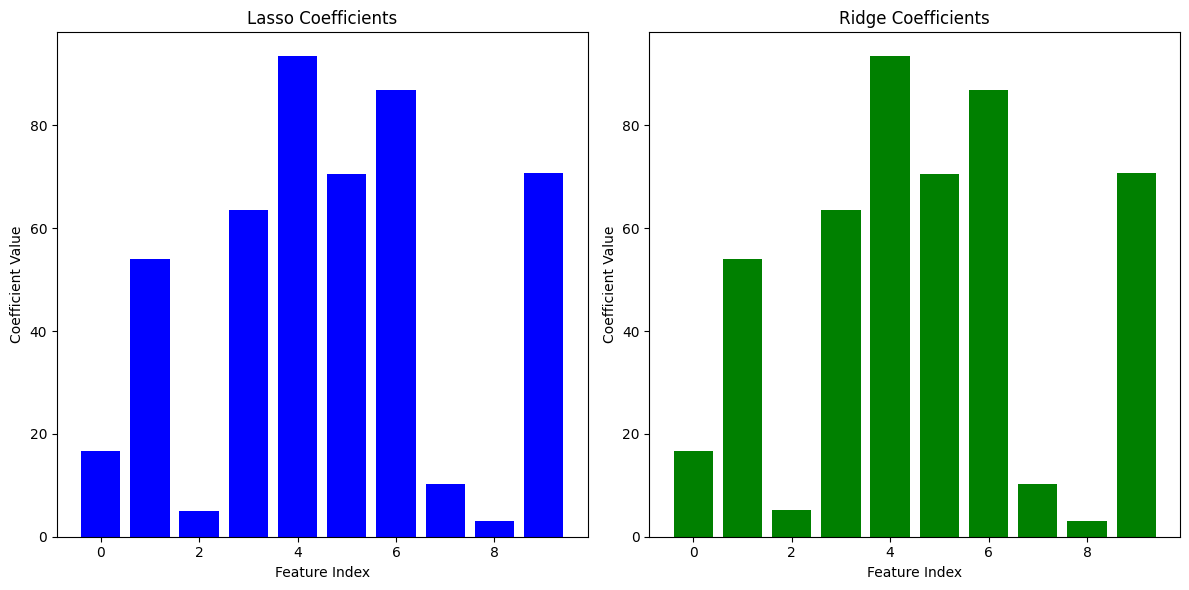

MSE for Lasso: 0.24588825325744196
MSE for Ridge: 0.1676643444547657


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data (100 samples, 10 features)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Lasso and Ridge models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Plotting the coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(lasso.coef_)), lasso.coef_, color='blue')
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(ridge.coef_)), ridge.coef_, color='green')
plt.title('Ridge Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Print out the MSE for both models
print(f'MSE for Lasso: {mse_lasso}')
print(f'MSE for Ridge: {mse_ridge}')


### 🧮 **Explanation of the Code:**

1. **Data Generation:** We generate a synthetic regression dataset with 100 samples and 10 features using `make_regression`.
2. **Model Training:** We train both **Lasso** and **Ridge** models using the same dataset.
3. **Predictions:** Predictions are made using the test set.
4. **MSE Calculation:** We calculate the Mean Squared Error (MSE) for both models to compare their performance.
5. **Coefficient Visualization:** The coefficients of both models are plotted side by side to visualize the impact of regularization. **Lasso** tends to shrink some coefficients to zero, making the model sparser, while **Ridge** shrinks coefficients but does not set them to zero.

---

### 📊 **Expected Output:**

You’ll see:
1. **Coefficient Plots:**  
   - The **Lasso coefficients** will have many values set to zero (feature selection).
   - The **Ridge coefficients** will all be shrunk, but none will be zero.

2. **MSE Values:**  
   Both models will show their MSEs, which you can compare to see how each regularization affects performance.

---

### 🔍 **Interpreting the Results:**
- **Lasso:** Typically results in a **sparser model**, where some features are excluded (coefficients are zero).
- **Ridge:** The coefficients are **shrunk towards zero**, but none are actually zero, meaning all features are still considered important.


## Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an example to illustrate.

**Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an example to illustrate.**

### **What is Overfitting?**

Overfitting occurs when a model learns not only the underlying patterns in the data but also the **noise** or random fluctuations in the training dataset. This leads to a model that performs well on the training data but poorly on unseen test data. Regularization helps prevent overfitting by **penalizing overly complex models**, making them simpler and more generalizable.

### **How Do Regularized Linear Models Help?**

Regularized linear models add a **penalty term** to the linear regression cost function. This penalty discourages large or overly complex coefficients, which helps to avoid overfitting. There are two main types of regularization techniques used with linear models:

1. **Ridge Regularization (L2 Regularization):**  
   Ridge adds a penalty proportional to the **squared magnitude** of the coefficients. This reduces the magnitude of the coefficients, thereby controlling model complexity and preventing overfitting.

   - **Cost function (Ridge):**
     $$
     \text{Cost Function} = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
     $$

2. **Lasso Regularization (L1 Regularization):**  
   Lasso adds a penalty proportional to the **absolute values** of the coefficients. This has the added effect of **shrinking some coefficients to zero**, effectively performing **feature selection** and eliminating irrelevant features.

   - **Cost function (Lasso):**
     $$
     \text{Cost Function} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|
     $$

By applying these regularization techniques, both **Ridge** and **Lasso** force the model to **avoid fitting the noise** and focus on the more generalizable patterns, leading to better performance on unseen data.

---

### **Example to Illustrate Regularization and Overfitting:**

Let’s assume you have a dataset where the target variable is influenced by a few key features, but there’s also a lot of **random noise** in the dataset.

#### **Scenario without Regularization (Overfitting):**

1. You fit a **non-regularized linear regression model** (simple linear regression).
2. The model fits the training data **perfectly**, learning not only the true patterns but also the noise.
3. When you evaluate the model on the test set, the performance is much worse than on the training set — indicating **overfitting**.

#### **Scenario with Regularization (Reduced Overfitting):**

1. You apply **Ridge or Lasso regularization** to the model.
2. The penalty term in the regularized model **shrinks the coefficients** of the less important features, thus reducing the complexity of the model.
3. The model now performs **better on the test set** because it’s generalized to the true underlying patterns rather than fitting noise.

---

### **Python Example:**

Here’s an example that demonstrates the effect of regularization in preventing overfitting with **Ridge** regularization.

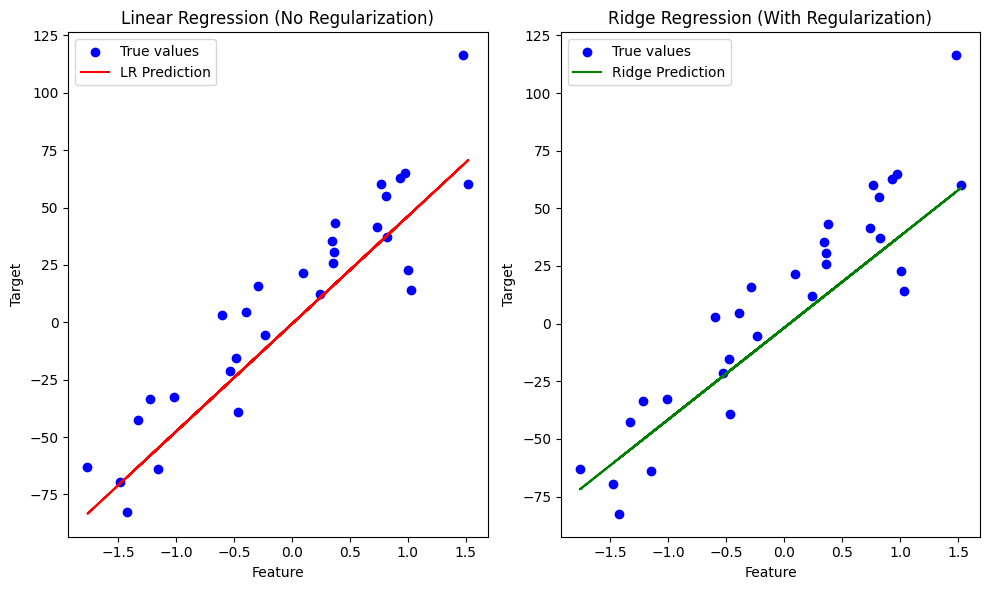

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate synthetic data with noise
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a regular Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train a Ridge Regression model (L2 regularization)
ridge_model = Ridge(alpha=10)  # Strong regularization
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE for both models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_lr, color='red', label='LR Prediction')
plt.title('Linear Regression (No Regularization)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Prediction')
plt.title('Ridge Regression (With Regularization)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

# Print out the MSE for both models
print(f'MSE for Linear Regression (No Regularization): {mse_lr}')
print(f'MSE for Ridge Regression (With Regularization): {mse_ridge}')

### **Expected Results:**
- **Linear Regression (No Regularization)** will likely show **very low training error** but a **high test error**, indicating overfitting.
- **Ridge Regression (With Regularization)** will have **lower test error**, demonstrating how regularization helps prevent overfitting and generalizes better to new data.

---

### **Key Takeaways:**
1. **Without Regularization:** The model fits the noise and performs well on training data but poorly on new data (overfitting).
2. **With Regularization:** The model focuses on the most important features, penalizing large coefficients and reducing complexity, which helps improve generalization and performance on unseen data.

## Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best choice for regression analysis.

**Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best choice for regression analysis.**

Regularized linear models, such as **Ridge** and **Lasso**, are widely used for regression tasks, especially when dealing with issues like multicollinearity and overfitting. However, despite their popularity, they come with several limitations. Here’s an overview of the main drawbacks and situations where regularized linear models may not be the best choice.

### **1. Assumption of Linearity**
- **Limitations:**
  - Regularized linear models are based on the assumption that there is a **linear relationship** between the input features and the target variable. If the true relationship is **non-linear**, these models may not capture the underlying patterns effectively.
  - If the data exhibits complex interactions between features or if the response variable depends on non-linear functions of the predictors, linear models (even with regularization) may not provide an adequate fit.

- **Why it might not always work:**
  - In cases where relationships between features are highly non-linear, methods like **decision trees**, **random forests**, or **neural networks** may perform better because they can handle more complex, non-linear relationships.

---

### **2. Difficulty Handling Highly Correlated Features**
- **Limitations:**
  - While **Ridge** regularization can handle multicollinearity by shrinking coefficients, **Lasso** regularization may struggle with **highly correlated features**. When features are highly correlated, Lasso tends to pick one of the correlated features and shrink others to zero, effectively performing feature selection.
  - This can lead to **instability** when features are highly collinear because the choice of which feature to retain may vary depending on small changes in the data.

- **Why it might not always work:**
  - In situations where multiple correlated features contribute valuable information and none should be discarded, **Elastic Net** (a combination of Lasso and Ridge) might be more appropriate as it can retain correlated features better.

---

### **3. Sensitivity to Hyperparameter Tuning**
- **Limitations:**
  - Regularized models require careful tuning of the **regularization parameter** (λ or alpha), which controls the strength of the penalty. If this parameter is not chosen correctly, it can lead to either **underfitting** (too high a regularization) or **overfitting** (too low a regularization).
  - **Model performance** can be highly sensitive to the choice of regularization strength, and this can sometimes make the models difficult to fine-tune, especially with limited data.

- **Why it might not always work:**
  - In cases where hyperparameter tuning is challenging or data is limited, simpler models like **ordinary least squares (OLS)** might be preferred if overfitting isn't a serious concern.

---

### **4. Lack of Interpretability in Some Cases**
- **Limitations:**
  - **Lasso** regression produces sparse models where many coefficients are set to zero, which aids in feature selection, but it can **remove important variables** if the regularization strength is too high.
  - **Ridge** regression shrinks coefficients but doesn't eliminate any features, which can sometimes make interpretation more difficult if there are many features.
  
- **Why it might not always work:**
  - If interpretability is crucial, and the model needs to clearly explain the influence of each feature on the prediction, regularization might obscure the understanding, especially when **multiple features** are involved.

---

### **5. Inability to Capture Complex Interactions**
- **Limitations:**
  - Regularized linear models like **Ridge** and **Lasso** typically assume that features are linearly related to the target. They don’t capture complex **feature interactions** unless the user manually includes interaction terms or polynomial features.
  - **Feature interactions** can sometimes be more important than the individual features themselves, especially in datasets with complex dependencies.

- **Why it might not always work:**
  - For datasets where interactions between features are complex and important, techniques like **decision trees**, **random forests**, or **gradient boosting machines (GBMs)** may provide more accurate predictions because they can capture complex interactions without the need for manual feature engineering.

---

### **6. Handling of Outliers**
- **Limitations:**
  - While regularization can reduce the influence of outliers by shrinking coefficients, the **squared penalty** in Ridge can still make the model sensitive to outliers in the data. Lasso, on the other hand, may perform feature selection in the presence of outliers, potentially discarding important predictors.
  
- **Why it might not always work:**
  - In datasets with extreme outliers, regularized linear models may not be the most robust choice. **Robust regression methods**, such as **Huber regression**, can handle outliers more effectively.

---

### **7. Performance with High-Dimensional Data**
- **Limitations:**
  - Although Lasso is often used for **feature selection** in high-dimensional datasets (where the number of features is much larger than the number of samples), regularized linear models may still perform poorly if there are too many irrelevant features and the data is not well-conditioned.
  - If the number of features is vastly larger than the number of data points, regularization may still struggle to identify the most important features accurately, especially in the case of **highly sparse data**.

- **Why it might not always work:**
  - For very high-dimensional datasets, **dimensionality reduction** techniques like **Principal Component Analysis (PCA)** or **autoencoders** might be more effective before applying linear models.

---

### **8. Regularization May Not Be Sufficient for Complex Models**
- **Limitations:**
  - In complex machine learning problems, **regularized linear models** might not be sufficient to capture all the intricate patterns in the data.
  
- **Why it might not always work:**
  - **Deep learning models** (e.g., neural networks) or **ensemble methods** (e.g., random forests or gradient boosting) can capture much more complex relationships, but they typically require a larger dataset and more computational resources.

---

### **Summary of Limitations:**

| Limitation                         | Explanation                                                                                         |
|-------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Linearity Assumption**            | Regularized linear models assume linear relationships and may fail with non-linear data.            |
| **Correlated Features**             | Lasso may eliminate important correlated features, leading to instability.                          |
| **Hyperparameter Sensitivity**     | The models are sensitive to the regularization parameter, making tuning difficult.                   |
| **Interpretability**                | Lasso and Ridge may make the model harder to interpret, especially with many features.              |
| **Complex Interactions**           | Regularized linear models struggle to capture complex interactions between features.                |
| **Outliers**                        | They may still be sensitive to outliers, despite the regularization.                                |
| **High-Dimensional Data**           | May not perform well with extremely high-dimensional datasets with many irrelevant features.        |
| **Complexity of the Problem**       | Regularized linear models may not be sufficient for highly complex problems compared to other models. |

---

### **When Regularized Linear Models Are Not Ideal:**
- **Non-linear relationships**: When the data exhibits complex non-linear patterns.
- **Highly correlated features**: When all features are important, and none should be discarded.
- **Feature interactions**: When interactions between features play a key role in the prediction.
- **Outliers**: When extreme values significantly impact model performance.
- **High-dimensional sparse data**: When the data has a very large number of features, but many are irrelevant or highly sparse.

---

In such cases, **non-linear models**, **tree-based models**, or **ensemble methods** like **random forests** and **gradient boosting** might be better suited to capture the complexities of the data.


## **Q9. You are comparing the performance of two regression models using different evaluation metrics. Model A has an RMSE of 10, while Model B has an MAE of 8. Which model would you choose as the better performer, and why? Are there any limitations to your choice of metric?** 


### **Choosing the Better Model Based on RMSE and MAE:**

- **Model A (RMSE = 10)**:  
  RMSE (Root Mean Squared Error) is sensitive to **large errors** due to its squaring of the residuals. This means that if there are outliers or large deviations in the data, RMSE will penalize the model heavily. A lower RMSE suggests that the model is performing better in terms of **overall error magnitude** but may be influenced by outliers.

- **Model B (MAE = 8)**:  
  MAE (Mean Absolute Error) is less sensitive to large errors compared to RMSE, as it simply averages the absolute differences between the predicted and actual values. A lower MAE suggests that the model is performing well in terms of the **average absolute error**. MAE gives a more **consistent view** of the model's performance across different predictions.

### **Which Model is Better?**

- **If you care more about large deviations:**  
  You may prefer **Model A** with RMSE = 10. This is because RMSE gives a larger penalty to larger errors, so **Model A may be penalizing a few larger errors**, but it could be more accurate overall when considering **larger error magnitudes**.

- **If you care more about the average error:**  
  You may prefer **Model B** with MAE = 8. This is because MAE is **less influenced by outliers** and gives you a **better sense of the model's typical prediction error**, regardless of whether some predictions are far off.

### **Choosing the Better Model:**
- If the **data contains outliers** or if **large deviations** are particularly undesirable, **RMSE** might give you more insight into how well each model handles these large errors. If **consistency** in errors (without large outliers) is more important, **MAE** might be the better metric.

- **In this case**, since Model A has an RMSE of 10 and Model B has an MAE of 8, **Model B (MAE = 8)** may be considered better in general because it indicates the model's performance in terms of typical absolute error, without being overly influenced by any extreme outliers. **Model A** might have a larger error due to outliers or large deviations, which could be penalized more by RMSE.

### **Limitations of Your Choice of Metric:**

1. **RMSE is Sensitive to Outliers:**
   - RMSE's sensitivity to large errors can be both an advantage and a disadvantage. If your dataset has outliers, RMSE may penalize the model heavily, making it seem worse than it is. However, if large errors are particularly harmful for your use case, RMSE will help prioritize models that perform well with respect to these large deviations.

2. **MAE Doesn't Penalize Large Errors:**
   - MAE provides a **more robust measure** in the presence of outliers, but it **doesn't penalize large errors** as much as RMSE. As a result, models that may have a few large errors can still score well with MAE, which can sometimes mask the model's true performance in certain situations.

3. **Problem-Specific Needs:**
   - **Context matters**: Depending on the problem you're solving, you may care more about small, consistent errors (favoring MAE) or large error magnitudes (favoring RMSE). For example, if you're predicting prices or financial metrics, outliers might represent a significant problem, in which case RMSE could be more appropriate.

4. **Different Sensitivity to Error Distribution:**
   - **MAE** provides a **uniform penalty** to all errors, while **RMSE** disproportionately penalizes **larger errors**, meaning that RMSE is more sensitive to the error distribution in your predictions.

---

### **Conclusion:**

- **Choose Model B** if the typical error (average absolute deviation) is more important to you and the model is expected to work well with a wider range of errors, including small ones.
- **Choose Model A** if large errors are significantly more problematic or costly in your application, and you want to prioritize minimizing those large deviations, even at the cost of slightly higher average error.


## Q10. You are comparing the performance of two regularized linear models using different types of regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the better performer, and why? Are there any trade-offs or limitations to your choice of regularization method?

**Q10. You are comparing the performance of two regularized linear models using different types of regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the better performer, and why? Are there any trade-offs or limitations to your choice of regularization method?**

### **Comparison of Ridge and Lasso Regularization**

To determine which model performs better, we need to understand the effects of Ridge and Lasso regularization and the implications of their respective regularization parameters.

#### **1. Ridge Regularization (Model A, λ = 0.1):**
- **Nature**: Ridge regularization (L2 regularization) adds a penalty proportional to the **squared magnitude** of the coefficients:
  $$
  \text{Cost Function (Ridge)} = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
  $$
  Ridge regularization helps to shrink the coefficients and reduce their magnitude but does not force any coefficients to exactly zero. Therefore, it **does not perform feature selection**.
  
- **Effect of λ = 0.1**: A regularization parameter of 0.1 is relatively **small**, meaning the regularization effect will be **mild**, allowing the model to retain many features while still slightly penalizing large coefficients to avoid overfitting.

#### **2. Lasso Regularization (Model B, λ = 0.5):**
- **Nature**: Lasso regularization (L1 regularization) adds a penalty proportional to the **absolute magnitude** of the coefficients:
  $$
  \text{Cost Function (Lasso)} = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j|
  $$
  Lasso regularization can shrink some coefficients to exactly zero, effectively **performing feature selection**. This means it tends to produce a **sparser model** where only the most important features are retained.

- **Effect of λ = 0.5**: A regularization parameter of 0.5 is **moderate to strong**, and it will impose a significant penalty on the coefficients. This can lead to many coefficients being driven to zero, especially if there are many **irrelevant features** in the dataset.

### **Which Model Would You Choose?**

- **If your goal is to reduce overfitting and simplify the model** while maintaining many features, **Model A (Ridge regularization with λ = 0.1)** might be more appropriate. The regularization strength is mild, so the model will not be overly penalized, and it will retain all features with some shrinkage of coefficients. Ridge regularization can perform well when all features are believed to have some importance.

- **If your goal is to perform feature selection** and reduce the complexity of the model by eliminating irrelevant features, **Model B (Lasso regularization with λ = 0.5)** might be the better choice. Lasso is more aggressive in reducing the number of features by driving some coefficients to zero, which helps in **simplifying the model** and focusing on the most relevant features. However, it is important to note that Lasso might **over-penalize** if λ is too large, potentially eliminating useful features.

### **Trade-offs and Limitations:**

#### **1. Ridge Regularization:**
- **Advantages:**
  - Ridge tends to **perform better in cases where all features are relevant** because it shrinks coefficients but doesn’t eliminate them.
  - It can handle **multicollinearity** (when predictors are highly correlated) by distributing the penalty across correlated features.
  
- **Limitations:**
  - Ridge does **not perform feature selection**; all features remain in the model, which may lead to a less interpretable model in cases where some features are irrelevant.
  - In cases where there are **many irrelevant features**, Ridge may keep those features in the model, potentially leading to overfitting.

#### **2. Lasso Regularization:**
- **Advantages:**
  - Lasso can **eliminate irrelevant features**, which improves model interpretability by keeping only the most significant features.
  - It is especially useful in **high-dimensional datasets** where the number of features is much larger than the number of observations.
  
- **Limitations:**
  - Lasso may be too aggressive in **driving coefficients to zero**, especially when the regularization parameter is too high. This could lead to **underfitting** if too many features are discarded.
  - Lasso struggles when **predictors are highly correlated**. It tends to select one of the correlated features and discard others, potentially losing valuable information.

#### **3. Combined Use: Elastic Net Regularization:**
- If you're unsure whether Ridge or Lasso would be more appropriate, you could consider using **Elastic Net**, which combines both L1 and L2 penalties. This allows the model to benefit from **feature selection (Lasso)** and **multicollinearity handling (Ridge)**.

---

### **Summary of When to Use Each Regularization:**

| **Regularization** | **Best Use Case**                               | **Key Advantage**                | **Limitation**                              |
|--------------------|------------------------------------------------|----------------------------------|---------------------------------------------|
| **Ridge (L2)**     | When all features are likely important and multicollinearity is a concern. | Reduces overfitting without eliminating features. | Does not perform feature selection, so it can retain irrelevant features. |
| **Lasso (L1)**     | When feature selection is important, and you expect some features to be irrelevant. | Can eliminate irrelevant features, leading to a sparse model. | May discard useful features if regularization strength is too high. |
| **Elastic Net**    | When you need a balance between Lasso and Ridge (feature selection and multicollinearity handling). | Combines the strengths of both Lasso and Ridge. | Requires careful tuning of both L1 and L2 parameters. |

### **Conclusion:**

- **Choose Model A (Ridge)** if you believe that **all features are important** or if multicollinearity is an issue, and you want to preserve most of the features with a slight reduction in their magnitude.
- **Choose Model B (Lasso)** if **feature selection** is crucial, and you expect some features to be irrelevant, but be cautious about the regularization strength (λ = 0.5) to avoid excessive elimination of useful features.

Ultimately, the choice between Ridge and Lasso depends on your specific problem, the nature of your features, and whether you prioritize **model simplicity and interpretability** (Lasso) or **preserving all features** (Ridge). 